# Scroll down for EDA on mental health providers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kff.org/other/state-indicator/opioid-overdose-death-rates/?currentTimeframe=1&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [2]:
rx_state_df = pd.read_csv('data/opioid_rx_state_level.csv')
rx_state_df = rx_state_df.drop(columns=['Unnamed: 3'])
rx_state_df.sort_values(by='Dispensing_Rate', ascending=False).head(10)

,Year,State,Dispensing_Rate
201,2009,WV,146.9
150,2008,WV,145.5
306,2012,AL,143.8
252,2010,WV,143.1
357,2013,AL,142.4
246,2010,TN,140.0
303,2011,WV,139.6
297,2011,TN,138.5
195,2009,TN,138.4
272,2011,KY,137.0


In [3]:
rx_state_df.isnull().sum()

Year               0
State              0
Dispensing_Rate    0
dtype: int64

In [4]:
death_state_df = pd.read_csv('data/opioid_deaths_state.csv')
death_state_df[death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
34,2006,ND,NSD,NR
50,2006,WY,NR,10.6
52,2007,AK,NR,10.1
85,2007,ND,NR,4.8
161,2009,DC,NSD,4.1
187,2009,ND,NSD,4.4
238,2010,ND,NSD,3.4
289,2011,ND,NSD,NSD
340,2012,ND,NSD,3.1
391,2013,ND,NSD,2.8


In [5]:
death_state_df = death_state_df[~death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].isin(['NSD', 'NR'])]
death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'] = death_state_df['Opioid Overdose Death Rate (Age-Adjusted)'].astype(float)
death_state_df.sort_values(by='Opioid Overdose Death Rate (Age-Adjusted)', ascending=False).head(10)

,Year,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
762,2020,WV,70.0,81.4
609,2017,WV,49.6,57.8
722,2020,DC,45.3,58.1
721,2020,DE,43.9,47.3
558,2016,WV,43.4,52
670,2019,DE,43.0,48
660,2018,WV,42.4,51.5
711,2019,WV,41.4,52.8
734,2020,MD,40.4,44.6
731,2020,KY,40.2,49.2


Text(0, 0.5, 'Opioid Dispensing Rate (per 100,000 persons)')

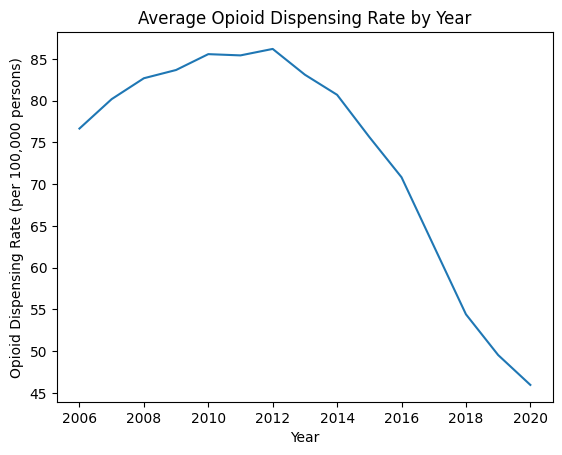

In [17]:
rx_state_df.groupby('Year').Dispensing_Rate.mean().plot.line()
plt.title('Average Opioid Dispensing Rate by Year')
plt.ylabel('Opioid Dispensing Rate (per 100,000 persons)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100,000 persons)')

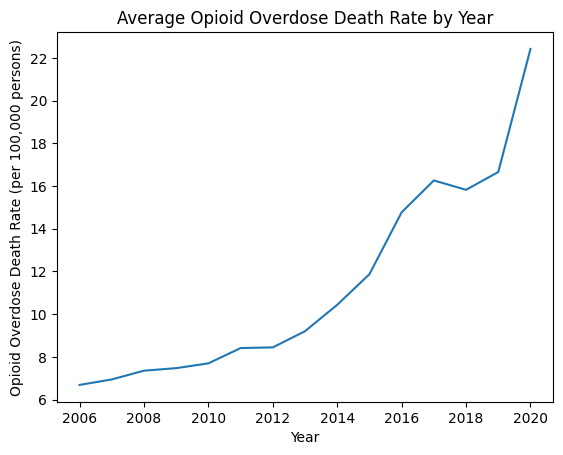

In [18]:
death_state_df.groupby('Year')['Opioid Overdose Death Rate (Age-Adjusted)'].mean().plot.line()
plt.title('Average Opioid Overdose Death Rate by Year')
plt.ylabel('Opioid Overdose Death Rate (per 100,000 persons)')

In [8]:
rx_death = pd.merge(rx_state_df, death_state_df, on=['State', 'Year'])
rx_death.sample(5)

,Year,State,Dispensing_Rate,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted)
654,2019,AL,85.8,8.9,16.3
594,2017,TX,52.2,5.1,10.5
481,2015,NY,45.1,10.8,13.6
190,2009,TX,71.8,4.6,9.8
587,2017,OK,88.6,10.2,20.1


Text(0.5, 0, 'Opioid Dispensing Rate')

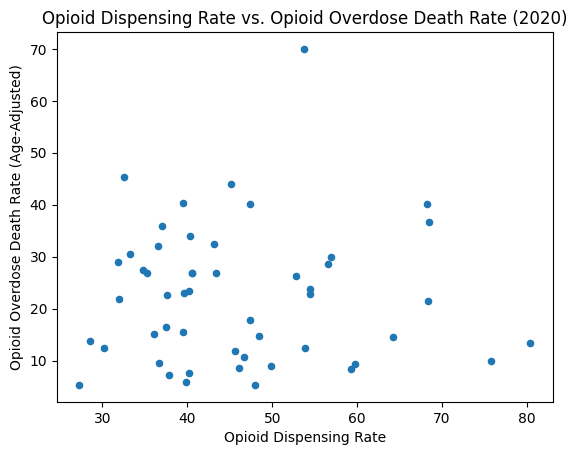

In [9]:
rx_death[rx_death.Year == 2020].plot.scatter(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)')
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')


Text(0.5, 0, 'Opioid Dispensing Rate')

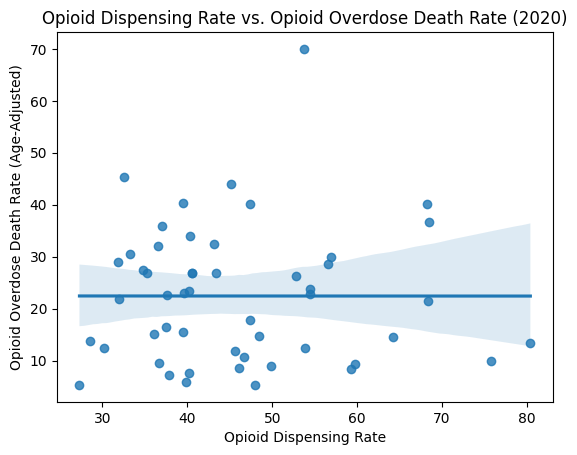

In [19]:
# regplot instead:
sns.regplot(x='Dispensing_Rate', y='Opioid Overdose Death Rate (Age-Adjusted)', data=rx_death[rx_death.Year == 2020])
plt.title('Opioid Dispensing Rate vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Opioid Dispensing Rate')

# BELOW IS MENTAL HEALTH PROVIDERS EDA

In [94]:
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

In [95]:
mental_health_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'REGION', 'AMFAR_MHFAC_RATE', 'AMFAR_MEDSAFAC_RATE']]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE,AMFAR_MEDSAFAC_RATE
2625,48201,Texas,Harris County,South,0.0093,0.0074
260,8027,Colorado,Custer County,West,0.1929,0.0000
2112,39135,Ohio,Preble County,Midwest,0.0490,0.0245
330,12017,Florida,Citrus County,South,0.0131,0.0065
1910,37037,North Carolina,Chatham County,South,0.0132,0.0264


In [96]:
mental_health_df.isnull().sum()

COUNTYFIPS              0
STATE                   0
COUNTY                  0
REGION                 85
AMFAR_MHFAC_RATE        9
AMFAR_MEDSAFAC_RATE     9
dtype: int64

In [97]:
mental_health_df = mental_health_df.dropna(subset=['AMFAR_MHFAC_RATE', 'AMFAR_MEDSAFAC_RATE'])
mental_health_df.COUNTYFIPS = mental_health_df.COUNTYFIPS.astype(float)

In [98]:
death_df = pd.read_csv("data/OpioidDeaths_2020.txt", sep="\t")
death_df = death_df.drop(columns="Notes")

death_df = death_df[death_df['Crude Rate'] != 'Unreliable']
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)
death_df.sort_values(by='Crude Rate', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
878,"McDowell County, WV",54047.0,27.0,16916.0,159.6
877,"Logan County, WV",54045.0,44.0,31688.0,138.9
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
621,"Scioto County, OH",39145.0,95.0,74347.0,127.8
868,"Cabell County, WV",54011.0,112.0,91589.0,122.3
888,"Raleigh County, WV",54081.0,86.0,72920.0,117.9
890,"Wayne County, WV",54099.0,46.0,39054.0,117.8
840,"Petersburg city, VA",51730.0,33.0,30446.0,108.4
727,"Cheatham County, TN",47021.0,39.0,41101.0,94.9
411,"St. Louis city, MO",29510.0,270.0,297645.0,90.7


In [99]:
death_mental_df = death_df.merge(mental_health_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE,AMFAR_MEDSAFAC_RATE
544,"Suffolk city, VA",51800.0,23.0,93913.0,24.5,51800.0,Virginia,Suffolk city,South,0.0319,0.0319
328,"Sullivan County, NY",36105.0,52.0,75802.0,68.6,36105.0,New York,Sullivan County,Northeast,0.0528,0.1055
374,"Cuyahoga County, OH",39035.0,426.0,1227883.0,34.7,39035.0,Ohio,Cuyahoga County,Midwest,0.0595,0.0366
23,"Humboldt County, CA",6023.0,24.0,134977.0,17.8,6023.0,California,Humboldt County,West,0.0519,0.0445
89,"Leon County, FL",12073.0,25.0,295460.0,8.5,12073.0,Florida,Leon County,South,0.0406,0.0169


Text(0, 0.5, 'Opioid Overdose Death Rate per 100k People')

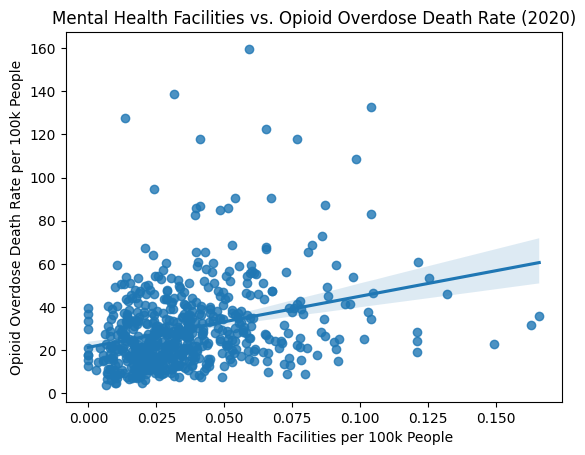

In [100]:
# now as regplot:
sns.regplot(x='AMFAR_MHFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Mental Health Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Mental Health Facilities per 100k People')
plt.ylabel('Opioid Overdose Death Rate per 100k People')

Text(0, 0.5, 'Opioid Overdose Death Rate per 100k People')

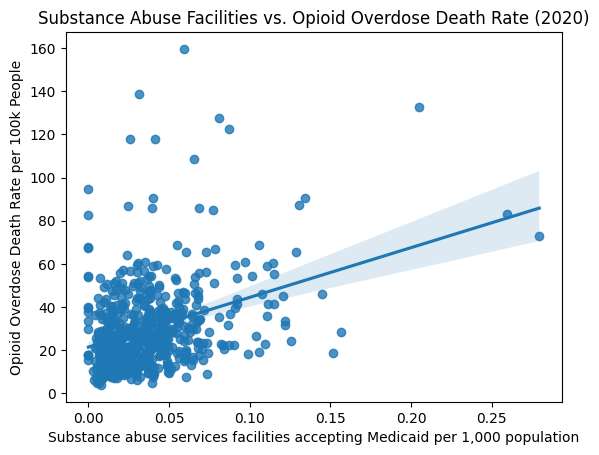

In [110]:
sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')

In [111]:
death_mental_df

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,REGION,AMFAR_MHFAC_RATE,AMFAR_MEDSAFAC_RATE
0,"Baldwin County, AL",1003.0,41.0,229287.0,17.9,1003.0,Alabama,Baldwin County,South,0.0174,0.0000
1,"Jefferson County, AL",1073.0,219.0,655342.0,33.4,1073.0,Alabama,Jefferson County,South,0.0183,0.0168
2,"Madison County, AL",1089.0,67.0,379453.0,17.7,1089.0,Alabama,Madison County,South,0.0211,0.0158
3,"Mobile County, AL",1097.0,46.0,412716.0,11.1,1097.0,Alabama,Mobile County,South,0.0073,0.0121
4,"Shelby County, AL",1117.0,24.0,221428.0,10.8,1117.0,Alabama,Shelby County,South,0.0226,0.0090
...,...,...,...,...,...,...,...,...,...,...,...
584,"Sheboygan County, WI",55117.0,22.0,115240.0,19.1,55117.0,Wisconsin,Sheboygan County,Midwest,0.0347,0.0607
585,"Walworth County, WI",55127.0,23.0,103953.0,22.1,55127.0,Wisconsin,Walworth County,Midwest,0.0385,0.0289
586,"Washington County, WI",55131.0,25.0,136445.0,18.3,55131.0,Wisconsin,Washington County,Midwest,0.0220,0.0073
587,"Waukesha County, WI",55133.0,83.0,406172.0,20.4,55133.0,Wisconsin,Waukesha County,Midwest,0.0542,0.0295


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


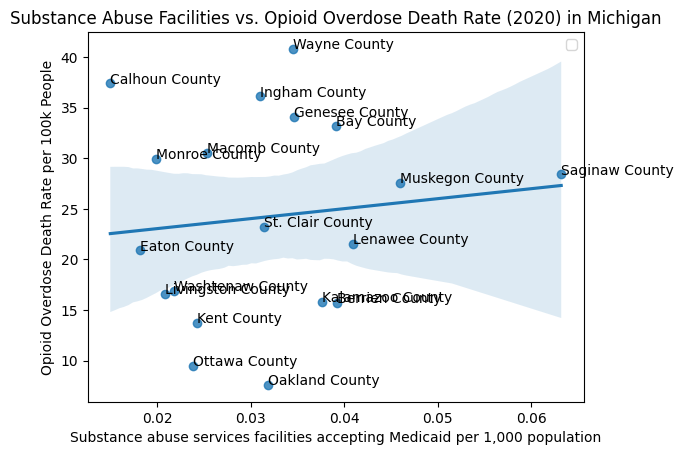

In [115]:
michigan_df = death_mental_df[death_mental_df.STATE == 'Michigan']

sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=michigan_df)

for i in range(len(michigan_df)):
    plt.text(michigan_df['AMFAR_MEDSAFAC_RATE'].iloc[i], michigan_df['Crude Rate'].iloc[i], michigan_df['COUNTY'].iloc[i])

plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020) in Michigan')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')
plt.legend()


In [102]:
pov_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'ACS_PCT_POV_BLACK', 'SAIPE_PCT_POV']].copy()
pov_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,ACS_PCT_POV_BLACK,SAIPE_PCT_POV
2040,38097,North Dakota,Traill County,17.31,7.0
2368,46011,South Dakota,Brookings County,16.61,9.9
2924,51590,Virginia,Danville city,27.99,22.1
2298,42105,Pennsylvania,Potter County,19.57,12.2
602,17011,Illinois,Bureau County,30.83,10.0


In [103]:
pov_df = pov_df.dropna(subset=['ACS_PCT_POV_BLACK', 'SAIPE_PCT_POV'])
pov_df.COUNTYFIPS = pov_df.COUNTYFIPS.astype(float)

In [104]:
pov_df.SAIPE_PCT_POV.describe()

count    2966.000000
mean       13.759036
std         5.425398
min         3.000000
25%         9.900000
50%        12.850000
75%        16.700000
max        43.300000
Name: SAIPE_PCT_POV, dtype: float64

In [105]:
pov_df['pov_cat'] = np.where(pov_df['SAIPE_PCT_POV'] <= 9.9, 'low', np.where(pov_df['SAIPE_PCT_POV'] >= 16.7, 'high', 'medium'))

In [106]:
death_pov_df = death_df.merge(pov_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_pov_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,ACS_PCT_POV_BLACK,SAIPE_PCT_POV,pov_cat
125,"Ada County, ID",16001.0,52.0,494399.0,10.5,16001.0,Idaho,Ada County,27.30,7.7,low
89,"Leon County, FL",12073.0,25.0,295460.0,8.5,12073.0,Florida,Leon County,29.10,17.6,high
506,"Harris County, TX",48201.0,514.0,4738253.0,10.8,48201.0,Texas,Harris County,19.15,15.9,medium
524,"Chesterfield County, VA",51041.0,106.0,358245.0,29.6,51041.0,Virginia,Chesterfield County,9.02,6.6,low
228,"Bay County, MI",26017.0,34.0,102387.0,33.2,26017.0,Michigan,Bay County,42.34,12.7,medium


Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

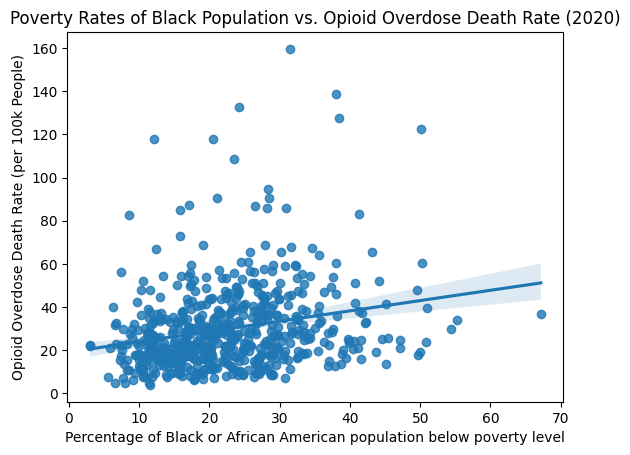

In [107]:
sns.regplot(x='ACS_PCT_POV_BLACK', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates of Black Population vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Percentage of Black or African American population below poverty level')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

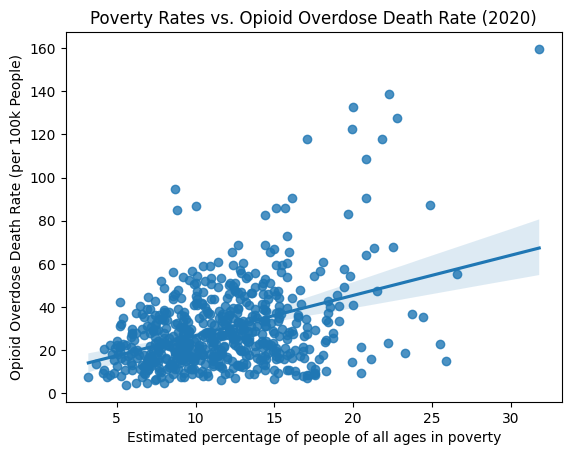

In [108]:
sns.regplot(x='SAIPE_PCT_POV', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Estimated percentage of people of all ages in poverty')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100,000)')

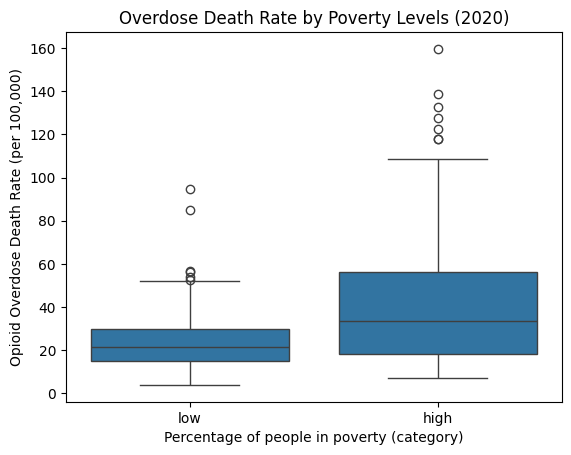

In [109]:
# Filter the data for low and high pov_cat
filtered_data = death_pov_df[death_pov_df['pov_cat'].isin(['low', 'high'])]

# Create the side-by-side boxplots
sns.boxplot(x='pov_cat', y='Crude Rate', data=filtered_data)
plt.title('Overdose Death Rate by Poverty Levels (2020)')
plt.xlabel('Percentage of people in poverty (category)')
plt.ylabel('Opioid Overdose Death Rate (per 100,000)')
